# Introduction to neural network classification with tensorflow

In this notebook we are going to learn how to write neural network for classification problems. A classification is when you try to classify something as one thing or another.
A few types of classification problems:
* Binary classification.
* Multiclass classification.
* Multilabel classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles

x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state =42)

In [2]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Lets visualize data

In [4]:
import pandas as pd 
circles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"labels":y})
circles

,x0,x1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


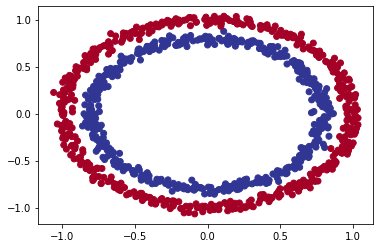

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input and Output shape

In [6]:
# Check the shape of our features and labels
x.shape,y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(x),len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling 

In [9]:
import tensorflow as tf
import sklearn
tf.random.set_seed(42)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train,y_train

(array([[-0.99308428, -0.12178199],
        [ 0.19654822,  1.03327993],
        [-0.64249042, -0.54409929],
        ...,
        [ 0.80989514, -0.13874155],
        [ 0.55778227, -0.57087612],
        [ 0.18020822,  0.79970203]]),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 

In [12]:

# Creaqting a neural network model that fits with our data
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
  
])

model_a.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics =["accuracy"]
)
model_a.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 1.3868 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7345 - accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.4938
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.4963
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.4975
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.4900
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.4913
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.4913
Epoch 11/

In [13]:
model_a.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4600


[0.6963533759117126, 0.46000000834465027]

In [14]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

# Improving our model

In [15]:
tf.random.set_seed(42)
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_b.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
model_b.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.4762
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4875
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4963
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4850
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4888
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4963
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5088
Epoch 11/

In [16]:
model_b.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5100


[0.6944056153297424, 0.5099999904632568]

In [17]:
prediction=model_b.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [18]:
prediction.shape,x_test.shape


((200, 1), (200, 2))

In [19]:
import numpy as np

In [20]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [21]:
prediction.shape

(200, 1)

In [ ]:
# To visualize our model predictiion lets make a function 
# Take in features and labels x and y
# Create a mesh grid of different x values
# make the prediction against thew meshgrid
# plot the predictions as well as a line between zones

In [38]:
import numpy as np
def plot_decision_boundary(model,x,y):
  "plots the decision boundry created by a model prediction on x"
  x_min,x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max = x[:,1].min()-0.1,x[:,1].max()+0.1 

  xx,yy =np.meshgrid(np.linspace(x_min,x_max,100),
                   np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0])>1:
       y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
      y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step


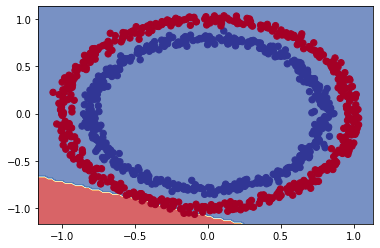

In [39]:
plot_decision_boundary(model_b,x,y);

In [40]:
# The model is learning a linear pattern

In [51]:
tf.random.set_seed(42)
# We are goinig to make changes in the model 
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling a model 
model_c.compile(
    loss = tf.keras.losses.MAE,
    optimizer= tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)


In [56]:
# Lets see if our model works for a regression problem
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)
x_regression,y_regression

# lets soplit our trining and testing data into tyrain and test

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our moodel to the  regression data

model_c.fit(tf.expand_dims(x_reg_train,axis=1),tf.expand_dims(y_reg_train,axis=1),epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 38.1030 - mae: 38.1030
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9900 - mae: 37.9900
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 38.0777 - mae: 38.0777
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9455 - mae: 37.9455
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9856 - mae: 37.9856
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 37.9581 - mae: 37.9581
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 38.1302 - mae: 38.1302
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 38.0093 - mae: 38.0093
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 37.6469 - mae: 37.6469
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 37.8142 - mae: 37.8142
Epoch 11/100
5/5 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 5ms/step


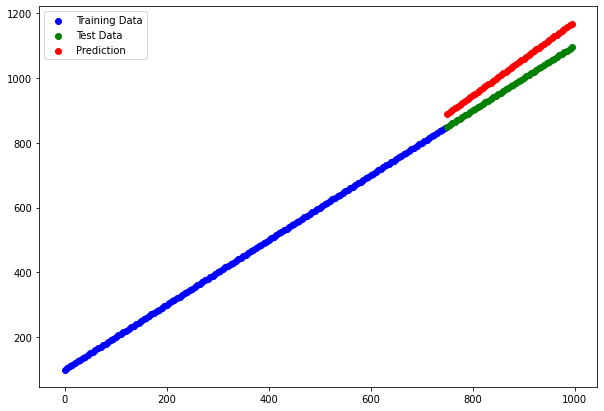

In [58]:
y_reg_preds = model_c.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(x_reg_test,y_reg_test,c="g",label="Test Data")
plt.scatter(x_reg_test,y_reg_preds,c="r",label="Prediction")
plt.legend();

## The missing piece: Non Linearity

In [59]:
# Set the random seed
tf.random.set_seed(42)
model_d = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation= tf.keras.activations.linear)
]
)
model_d.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_d.fit(x,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/100
32/32 [=

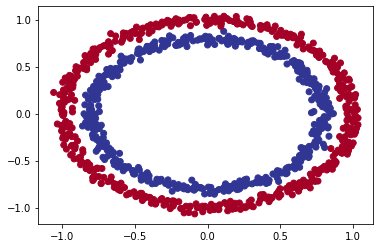

In [60]:
# Check out our data
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step


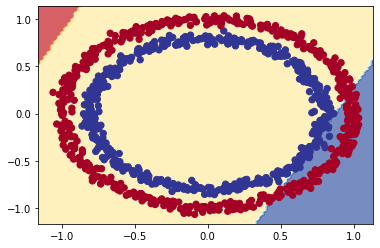

In [61]:
# Check the decission boundary
plot_decision_boundary(model_d,x,y)

let try to build a neural network with a non linear activation

In [63]:
tf.random.set_seed(42)

model_e = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_e.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history = model_e.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

In [75]:
tf.random.set_seed(42)

model_f = tf.keras.Sequential([
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1)
])
model_f.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
history = model_f.fit(x,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

In [76]:
model_f.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step


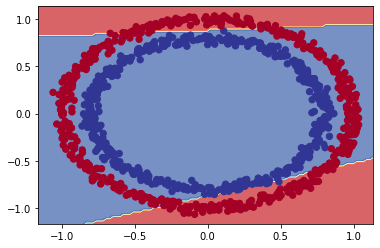

In [77]:
# How does our models predictions look like
plot_decision_boundary(model_f,x,y)

In [85]:
model_g = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_g.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

model_g.fit(tf.expand_dims(x,axis=1),tf.expand_dims(y,axis=1),epaaochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.7516 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.4980
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7225 - accuracy: 0.4980
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.4910
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4890
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.4590
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.4340
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4170
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4170
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.4310
Epoch 11/250
32/32 [=

In [86]:
model_g.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9910


[0.11182142049074173, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step


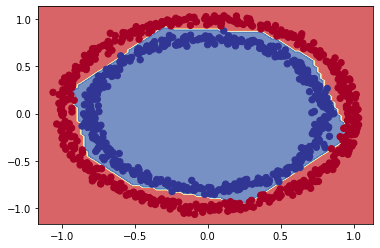

In [87]:
# Lets Visualize
plot_decision_boundary(model_g,x,y)

In [111]:
model_h = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_h.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)

history = model_h.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 4ms/step - loss: 0.6969 - accuracy: 0.4875
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5100
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5375
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5325
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5450
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5512
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.5863
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.6862
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.7237
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7513
Epoch 11/25
25/25 [===========

In [108]:
model_h.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9900


[0.11607928574085236, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step


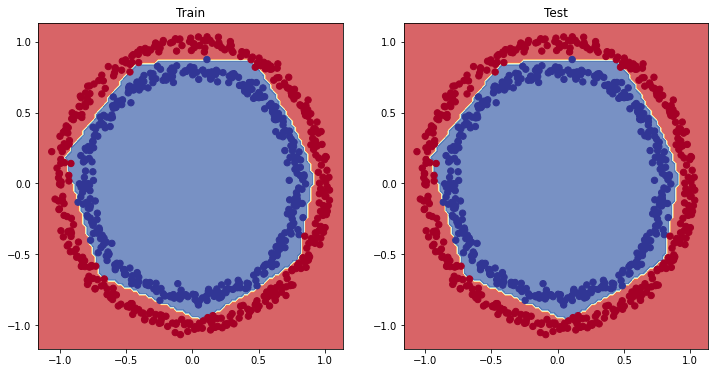

In [109]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_h,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_h,x_train,y_train)
plt.show();

In [91]:
# Create a toy tensor (similar to the data we pass into )
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

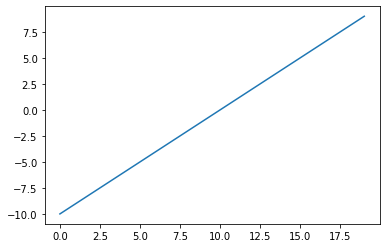

In [92]:
# Visualizing Tensor
plt.plot(A)

In [100]:
# Lets start by replicate sigmoid
def sigmoid(x):
  return(1/(1+tf.exp(-x)))
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

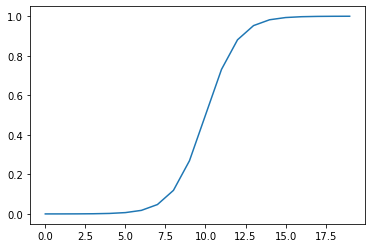

In [101]:
# Plot simoid of A
plt.plot(sigmoid(A))

In [103]:
# Lets recreate the relu function
def relu(x):
  return (tf.maximum(0,x))
# Pass Tensor to relu

relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

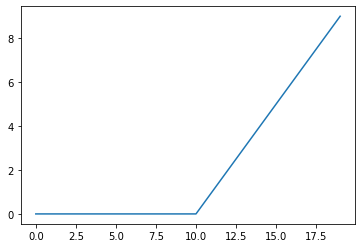

In [104]:
# Plot Relu modified tensor
plt.plot(relu(A))

In [105]:
# Lets try linear activation function 
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

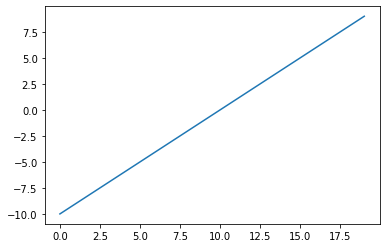

In [106]:
# Does the linear activation function changes any thing

plt.plot(tf.keras.activations.linear(A))

# Plot the loss Curve

In [112]:
history.history

{'loss': [0.6969004273414612,
  0.6887885928153992,
  0.6843195557594299,
  0.6804131269454956,
  0.6753953695297241,
  0.6688354015350342,
  0.6594831347465515,
  0.6366079449653625,
  0.6107596755027771,
  0.5830438137054443,
  0.5255870819091797,
  0.45871028304100037,
  0.3943624496459961,
  0.34428560733795166,
  0.31815314292907715,
  0.2813812792301178,
  0.23901991546154022,
  0.21439026296138763,
  0.19407571852207184,
  0.18048778176307678,
  0.1754426807165146,
  0.15204225480556488,
  0.14862953126430511,
  0.14668281376361847,
  0.14121289551258087],
 'accuracy': [0.48750001192092896,
  0.5099999904632568,
  0.5375000238418579,
  0.5325000286102295,
  0.5450000166893005,
  0.5512499809265137,
  0.5862500071525574,
  0.6862499713897705,
  0.7237499952316284,
  0.7512500286102295,
  0.8100000023841858,
  0.8587499856948853,
  0.9150000214576721,
  0.9237499833106995,
  0.9200000166893005,
  0.9387500286102295,
  0.9612500071525574,
  0.9637500047683716,
  0.9725000262260437,

Text(0.5, 1.0, 'Model_h loss curve')

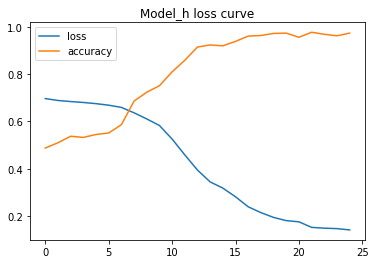

In [116]:
pd.DataFrame(history.history).plot()
plt.title("Model_h loss curve")

In [125]:
model_i = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_i.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)
# Creating callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 *10**(epoch/20))

history_i = model_i.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7029 - accuracy: 0.5013 - lr: 1.0000e-06
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 1.1220e-06
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 1.2589e-06
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 1.4125e-06
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 1.5849e-06
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 1.7783e-06
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 1.9953e-06
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5038 - lr: 2.2387e-06
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

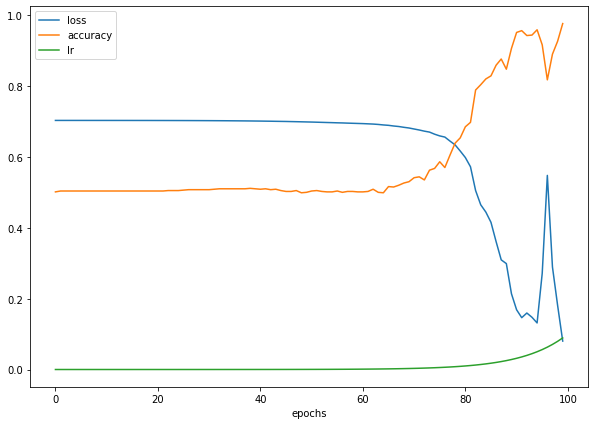

In [126]:
# Lets check out the history
pd.DataFrame(history_i.history).plot(figsize=(10,7),xlabel="epochs");

In [131]:
# Plot the learning rate vs loss
lrs = 1e-6 *(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-06, 1.12201845e-06, 1.25892541e-06, 1.41253754e-06,
       1.58489319e-06, 1.77827941e-06, 1.99526231e-06, 2.23872114e-06,
       2.51188643e-06, 2.81838293e-06, 3.16227766e-06, 3.54813389e-06,
       3.98107171e-06, 4.46683592e-06, 5.01187234e-06, 5.62341325e-06,
       6.30957344e-06, 7.07945784e-06, 7.94328235e-06, 8.91250938e-06,
       1.00000000e-05, 1.12201845e-05, 1.25892541e-05, 1.41253754e-05,
       1.58489319e-05, 1.77827941e-05, 1.99526231e-05, 2.23872114e-05,
       2.51188643e-05, 2.81838293e-05, 3.16227766e-05, 3.54813389e-05,
       3.98107171e-05, 4.46683592e-05, 5.01187234e-05, 5.62341325e-05,
       6.30957344e-05, 7.07945784e-05, 7.94328235e-05, 8.91250938e-05,
       1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.4668

Text(0.5, 1.0, 'learning rate vs loss')

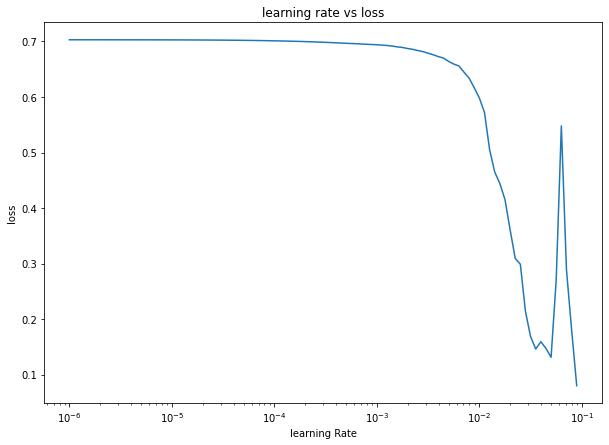

In [133]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_i.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [135]:
model_j = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_j.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ["accuracy"]
)

history_j = model_j.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5088
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5987
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6200
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6825
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7763
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8050
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8338
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.9262
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9725
Epoch 11/20
25/25 [===========

In [136]:
model_j.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9850


[0.048727311193943024, 0.9850000143051147]

In [137]:
model_i.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9950


[0.05845513939857483, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step


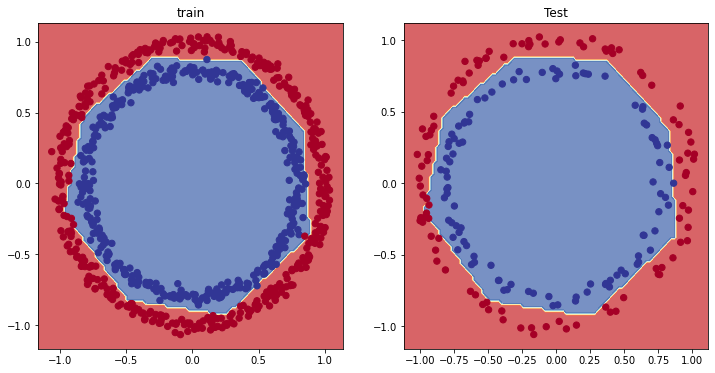

In [138]:
# Plot the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_j,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_j,x_test,y_test)
plt.show();